<img src='https://www.sharif.edu/documents/20124/0/logo-fa-IR.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 5 - Logistic Regression <br>
<font color=696880 size=4>
    Amirreza Mirzaei

____

The output of some cells have not been removed. You can use them to check your code.

# Personal Data

In [1]:
# Set your student number and name
student_number = '99101087'
Name = 'AmirReza'
Last_Name = 'Azari'

## Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

Don't import any other library.

# Logistic Regression (35 Points)

<font size=4>
Author: Amirreza Mirzaei
<br/>
<font color=red>
Please run all the cells.
</font>
</font>
<br/>
</div>

In this notebook you will implement Logistic Regression from scratch. First you will implement all the needed function in order to use Logistic Regression. After that you will test your implementation on a dummy dataset and visualize the model boundary. Then you will do the same on a tweet sentiment classification dataset.

### 1: Creating Dummy Dataset

We will use sklearn library to create a simple 2D dataset. The dataset is almost linearly separable so we expect to get a high accuracy if we use a linear classification model such as logistic regression.

shape of X=(600, 2)
shape of y=(600,)


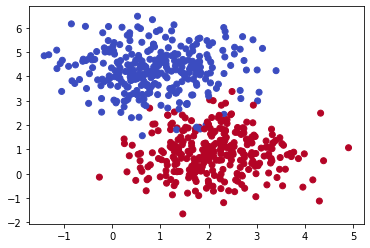

In [3]:
X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.90)


print(f'shape of X={X.shape}')
print(f'shape of y={y.shape}')

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.show()

### 2 : Implementing model (20 points)

As you know the parameters of a logistic regression model are the vector $\mathbf{w}$ and the scalar $\mathbf{b}$. we use the function below to assign a scalar to each data point. This scalar can be interpreted as the probability of the datapoint being a member of the positive class.

$$f_{\mathbf{w},b}(x)=g(\mathbf{w}\cdot\mathbf{x}+b)$$

Where the function $\mathbf{g}$ is the function below which is called the sigmoid function.
$$g(z) = \frac{1}{1+e^{-z}}$$


Implement the sigmoid function below.

In [4]:
# 2 points
def sigmoid(z):
    '''
    Input:
        z : numpy array with shape (m,)
    Output:
        g : sigmoid of every element of z with shape (m,)
    '''
    g = 1/(1 + np.exp(-z))
    return g

In [5]:
sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

Next implement a function to compute the function f.

In [6]:
# 3 points
def f_wb(X, w, b):
    '''
    Input:
        X : numpy array with shape (m,d)
        w : numpy array with shape (d,)
        b : float
    Output:
        f : numpy array with shape (n,)
    '''
    return sigmoid(np.dot(X, w) + b)

X = np.array([[1,2] , [3,4]])
w = np.array([4, 2])
b = 3

f_wb(X, w, b)

array([0.9999833, 1.       ])

Next implement a function that calculate the accuracy of our model. If f_wb for a datapoint is more than a threshold(usually 0.5) the model must classify it as positive(1) otherwise it must classify it as negative(0).

In [7]:
# 3 points
def accuracy(X, y, w, b, prob_threshold=0.5):
    '''
    Input:
        X : numpy array with shape (m,d)
        y : numpy array with shape (m,)
        w : numpy array with shape (d,)
        b : float
    Output:
        cost : accuracy of our model.
    '''
    check = [0] * len(y)
    j = 0
    for i in f_wb(X, w, b):
        if i > prob_threshold:
            check[j] = 1
        j += 1
    return np.mean(check == y)

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

accuracy(x, y, w, b)

0.5

Now we will implement the cost function of logisitic regression. As you recall from the slides the cost function is:(m is equal to how many data point we have and d is the data dimension)
$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] + \frac{\lambda}{2}\sum_{i=0}^{d-1}\mathbf{w_i^2} \tag{1}$$
 $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

In [8]:
# 12 points
def J_wb(X, y, w, b, lambda_=0.1):
    '''
    Input:
        X : numpy array with shape (m,d)
        y : numpy array with shape (m,)
        w : numpy array with shape (d,)
        b : float
    Output:
        cost : float
    '''
    m, d = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        sig = sigmoid(z)
        cost += -y[i] * np.log(sig) - (1 - y[i]) * np.log(1 - sig)
    total_cost = cost / m + (lambda_ / 2) * np.sum(np.square(w))
    return total_cost

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

J_wb(x, y, w, b)

1.6895815620423111

### 3 : Implementing Training (15 points)

In order to train our model we will use gradient descent. So we need to compute the gradient of the cost function with respect to w and b. Implement the function below to compute the gradient.

In [9]:
# 10 point
def gradient_cost_function(X, y, w, b, lambda_=0.1):
    '''
    Input:
        X  : numpy array with shape (m,d)
        y  : numpy array with shape (m,)
        w  : numpy array with shape (d,)
        b  : float
    Output:
        dw : gradient of cost function with respect to w.
             numpy array with shape (d,)
        db : gradient of cost function with respect to b.
             float.
    '''
    m, d = X.shape
    dw = np.zeros(w.shape)
    db = 0
    for i in range(m):
        sig = sigmoid(np.dot(X[i], w) + b)          
        error  = sig - y[i]    
        db += error
        for j in range(d):
            dw[j] += error * X[i,j] + lambda_ * w[j]
    return dw / m, db / m

x = np.array([[1,2] , [3,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

gradient_cost_function(x, y, w, b)

(array([1.89185517, 2.32548416]), 0.46362898643758815)

Next implement the function below to run gradient descent. make sure to print the cost function each 10 iteration of gradient descent.

In [10]:
# 5 points
def gradient_descent(X, y, w, b, lr=1e-1, num_iter=100, lambda_=0.5):
    '''
    Input:
        X        : numpy array with shape (m,d)
        y        : numpy array with shape (m,)
        w        : numpy array with shape (d,)
        b        : float
        lr       : learning rate
        num_iter : iteration to run gradient descent. int
    Output:
        w        : w after iter run of gradient descent.
                   numpy array with shape (d,)
        b        : b after iter run of gradient descent.
                   numpy array with shape (d,)
    '''
    for i in range(num_iter):
        dw, db = gradient_cost_function(X, y, w, b, lambda_)
        w = w - lr * dw
        b = b - lr * db
        if i % 10 == 0:
            print(f'iteration {i+1}, cost {J_wb(X, y, w, b, lambda_)}')
    return w, b

x = np.array([[1,2] , [1,4], [5,6], [7,8]])
y = np.array([1, 0, 0, 1])
w = np.array([0.2, -0.1])
b = 3

w, b = gradient_descent(x, y, w, b)

iteration 1, cost 0.9930771292942226
iteration 11, cost 0.8607666419104533
iteration 21, cost 0.8351286624443668
iteration 31, cost 0.8182196387636274
iteration 41, cost 0.8042453089041421
iteration 51, cost 0.7917497603973438
iteration 61, cost 0.780340095551155
iteration 71, cost 0.7698775830044741
iteration 81, cost 0.7602843821887484
iteration 91, cost 0.7514982063814729


now we have everything to train our model. Lets create our dummy dataset again. We initialize w randomly using a normal distribution. Initialize b with 0.

In [11]:
X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.90)

w = np.random.normal(size=(2, ))
b = 0

We will use the function below to visualize the descion boundary(w) of logistic regression.

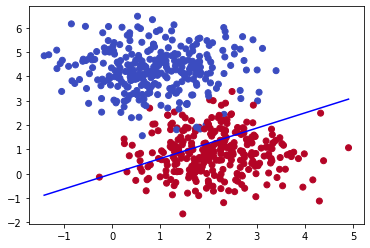

In [12]:
def visualize_boundary(X, y, w, b):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
    plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
    plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
    plt.plot(plot_x, plot_y, c="b")
    
visualize_boundary(X, y, w, b)

it's finally time to train the model.

iteration 1, cost 1.2121868432082803
iteration 11, cost 0.5008465825005399
iteration 21, cost 0.44811270963959654
iteration 31, cost 0.4376064130186094
iteration 41, cost 0.43289124308432547
iteration 51, cost 0.4293643856477021
iteration 61, cost 0.42633229103732395
iteration 71, cost 0.42365511107037923
iteration 81, cost 0.42127938697088174
iteration 91, cost 0.4191685532207645
iteration 101, cost 0.4172919777625609
iteration 111, cost 0.41562288863121993
iteration 121, cost 0.4141377014174083
iteration 131, cost 0.4128156027553473
iteration 141, cost 0.4116382108122002
iteration 151, cost 0.41058928135413114
iteration 161, cost 0.40965445065399075
iteration 171, cost 0.4088210102679053
iteration 181, cost 0.40807770965372764
iteration 191, cost 0.40741458312660517
accuracy model on train dataset=0.9683333333333334


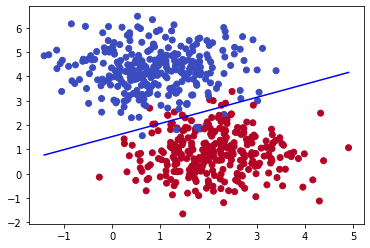

In [13]:
w, b = gradient_descent(X, y, w, b, num_iter=200)

print(f'accuracy model on train dataset={accuracy(X, y, w, b, prob_threshold=0.5)}')
visualize_boundary(X, y, w, b)

because our dataset is linearly seprable our model was able to find a good boundary. Now lets try the same thing but with a different dataset.

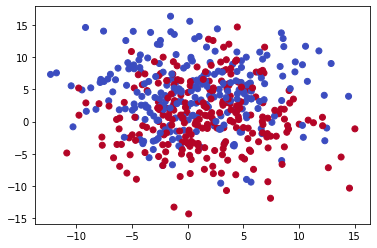

In [14]:
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

w = np.random.normal(size=(2, ))
b = 0

iteration 1, cost 3.6198735237736015
iteration 11, cost 0.7052424176471771
iteration 21, cost 0.6343889809218719
iteration 31, cost 0.6339370867910717
iteration 41, cost 0.6336202582575481
iteration 51, cost 0.6333978099631291
iteration 61, cost 0.633241438473279
iteration 71, cost 0.6331314011511054
iteration 81, cost 0.6330538990400957
iteration 91, cost 0.632999270147469
iteration 101, cost 0.632960738482727
iteration 111, cost 0.6329335454755716
iteration 121, cost 0.6329143453452653
iteration 131, cost 0.6329007832388188
iteration 141, cost 0.6328912002880176
iteration 151, cost 0.6328844270308073
iteration 161, cost 0.6328796384969376
iteration 171, cost 0.6328762524133349
iteration 181, cost 0.632873857615471
iteration 191, cost 0.6328721636512695
accuracy model on train dataset=0.676


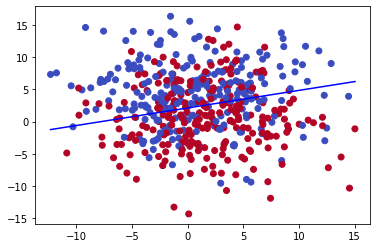

In [15]:
w, b = gradient_descent(X, y, w, b, num_iter=200)

print(f'accuracy model on train dataset={accuracy(X, y, w, b, prob_threshold=0.5)}')
visualize_boundary(X, y, w, b)

As you can see our model does not do very well in this case. In cases like this you can use more powerful models or add  higher dimension feature.

# 4 : Training on a Tweet Sentiment Analysis Dataset(Ungraded)

In this part we use the logistic regression model you implemented to classify whether a tweet contains a postivie or negative sentiment. You don't need to implement any code for this part. 

First we have to download our data. We will use the tweet dataset in nltk library. Which contains 5000 positive and 500 negative tweets.

In [16]:
import nltk
import string

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to C:\Users\Amir Reza
[nltk_data]     81\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Amir Reza
[nltk_data]     81\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
positive_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')
negative_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')

print(f'example positive tweet: {positive_tweets[0]}')
print(f'example negative tweet: {negative_tweets[0]}')

example positive tweet: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
example negative tweet: hopeless for tmr :(


we will use the function process_tweet to convert a tweet into a lists of word after removing any stopwords from it and stemming each word.

In [18]:
def process_tweet(tweet):
    stemmer = nltk.stem.PorterStemmer()
    stopwords_english = nltk.corpus.stopwords.words('english')

    tweet = tweet.replace('#','')

    tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  word not in string.punctuation): 
            stem_word = stemmer.stem(word) 
            tweets_clean.append(stem_word)

    return tweets_clean
  
process_tweet(positive_tweets[0])

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

In order to use logistic regression we need to represent each tweet as a fixed sized vector. We use a very simple idea to do this. First of all we will find the frequency of each word in the positive and negative classes.

We represent a tweet using a vector of two numbers. The first number is the sum of the positive frequency of each word of the tweet and the second number is the sum of the negative frequency of each word. For better performance we normalize this vector.

The following functions implement what we just talked about.

In [19]:
def create_freq(tweets):
  freq = {}
  for tweet in tweets:
    for word in process_tweet(tweet):
      if word in freq:
        freq[word] += 1
      else:
        freq[word] = 1
  return freq

freq_pos = create_freq(positive_tweets)
freq_neg = create_freq(negative_tweets)

In [20]:
def convert_tweet_to_vector(tweets, freq_pos, freq_neg):
  vectors = np.zeros((len(tweets), 2))
  for index, tweet in enumerate(tweets):
    for word in process_tweet(tweet):
      vectors[index][0] += freq_pos.get(word, 0)
      vectors[index][1] += freq_neg.get(word, 0)
    vectors[index] /= np.linalg.norm(vectors[index])
  return vectors 

pos_tweet_vectors = convert_tweet_to_vector(positive_tweets, freq_pos, freq_neg)
neg_tweet_vectors = convert_tweet_to_vector(negative_tweets, freq_pos, freq_neg)

print(pos_tweet_vectors[0:5])
print(neg_tweet_vectors[0:5])

[[0.99982849 0.01852011]
 [0.99375433 0.11159002]
 [0.99914153 0.04142719]
 [0.99999942 0.00107759]
 [0.99758745 0.06942102]]
[[4.35729806e-04 9.99999905e-01]
 [6.40935183e-02 9.97943897e-01]
 [4.54639164e-03 9.99989665e-01]
 [7.42553785e-03 9.99972430e-01]
 [6.28385297e-02 9.98023707e-01]]


Now lets create a train and test dataset. We choose the last 500 tweet of the positive and negative tweets as the test set and use the rest for training the model.

In [21]:
X_train = np.concatenate((pos_tweet_vectors[0:4500] , neg_tweet_vectors[0:4500]), axis=0)
Y_train = np.array([1] * 4500 + [0] * 4500)

X_test = np.concatenate((pos_tweet_vectors[4500:] , neg_tweet_vectors[4500:]), axis=0)
Y_test = np.array([1] * 500 + [0] * 500)

print(f'X_train shape={X_train.shape}, Y_train shape={Y_train.shape}')
print(f'X_test shape={X_test.shape}, Y_test shape={Y_test.shape}')

X_train shape=(9000, 2), Y_train shape=(9000,)
X_test shape=(1000, 2), Y_test shape=(1000,)


Now we can finally train our model and measure how well it does by alculating the accuracy on the test set.

In [22]:
w = np.random.normal(size=(2, ))
b = 0

w, b = gradient_descent(X_train, Y_train, w, b, num_iter=120)

print(f'accuracy model on train dataset={accuracy(X_train, Y_train, w, b, prob_threshold=0.5)}')
print(f'accuracy model on test dataset={accuracy(X_test, Y_test, w, b, prob_threshold=0.5)}')

iteration 1, cost 2.2809305600061487
iteration 11, cost 1.0650722131575667
iteration 21, cost 0.7382774831266118
iteration 31, cost 0.6520666942462726
iteration 41, cost 0.627333525025875
iteration 51, cost 0.6190312714029648
iteration 61, cost 0.6155463544506611
iteration 71, cost 0.6137114176343997
iteration 81, cost 0.6125807066822636
iteration 91, cost 0.6118248114360123
iteration 101, cost 0.6113011079862807
iteration 111, cost 0.6109329682511748
accuracy model on train dataset=0.9944444444444445
accuracy model on test dataset=0.992


You can use the model to classify your own tweets.

In [23]:
def classify_tweet(tweet, w, b, prob_threshold=0.5):
  vector = convert_tweet_to_vector([tweet], freq_pos, freq_neg)
  p = f_wb(vector, w, b)
  if p[0]>prob_threshold:
    print('positive :)')
  else:
    print('negative :(')

In [24]:
classify_tweet('I am happy.', w , b)

positive :)


In [25]:
classify_tweet('I am sad.', w , b)

negative :(
